# 1

In [ ]:
def train(con,tar):
  for i, val in enumarate(tar):
    if val.lower=="yes":
      speecific_h=con[i].copy()
      break

  for i, val in enumarate(con):
    if tar[i].lower()=="yes":
      for x in range(len(specific_h)):
        if val[x]!= specific_h[x]:
          specific_h[x]="?"
        else:
          pass
  return specific_h


# 2

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("MEL-lab2.csv")

concepts=np.array(df)[:,:-1]
target=np.array(df)[:,-1]
print("\nInstances are:\n", concepts)
print("\nTarget Values are: ", target)

In [ ]:
def learn(concepts, target):
    positive_instances = [concepts[i] for i in range(len(concepts)) if target[i] == 'yes']
    specific_h = positive_instances[0].copy()
    print("\nInitialization of specific_h and generic_h")
    print("\nSpecific Boundary: ", specific_h)

    # Fix the initialization of general_h
    general_h = [['?' for _ in range(len(specific_h))] for _ in range(len(specific_h))]
    print("\nGeneric Boundary: ", general_h)

    for i, h in enumerate(concepts):
        print("\nInstance", i + 1, "is ", h)
        if target[i] == "yes":
            print("Instance is Positive ")
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'

        if target[i] == "no":
            print("Instance is Negative ")
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x] if general_h[x][x] == '?' else general_h[x][x]
                else:
                    general_h[x][x] = '?' if general_h[x][x] == '?' else general_h[x][x]

        print("Specific Boundary after ", i + 1, "Instance is ", specific_h)
        print("Generic Boundary after ", i + 1, "Instance is ", general_h)
        print("\n")

    # Clean up the redundant hypotheses in the generic boundary
    indices = [i for i, val in enumerate(general_h) if val == ['?' for _ in range(len(specific_h))]]
    for i in indices:
        general_h.remove(['?' for _ in range(len(specific_h))])
    return specific_h, general_h

concepts = [
    ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same'],
    ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change']
]

target = ['yes', 'yes', 'no', 'yes']

s_final, g_final = learn(concepts, target)

print("Final Specific_h: ", s_final, sep="\n")
print("Final Generic_h: ", g_final, sep="\n")



Initialization of specific_h and generic_h

Specific Boundary:  ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']

Generic Boundary:  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Instance 1 is  ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
Instance is Positive 
Specific Boundary after  1 Instance is  ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
Generic Boundary after  1 Instance is  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]



Instance 2 is  ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same']
Instance is Positive 
Specific Boundary after  2 Instance is  ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
Generic Boundary after  2 Instance is  [['?', '?', '?', '?', '?', '?'

# 3

Accuracy: 1.0
Decision Tree Rules:
 |--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |   |

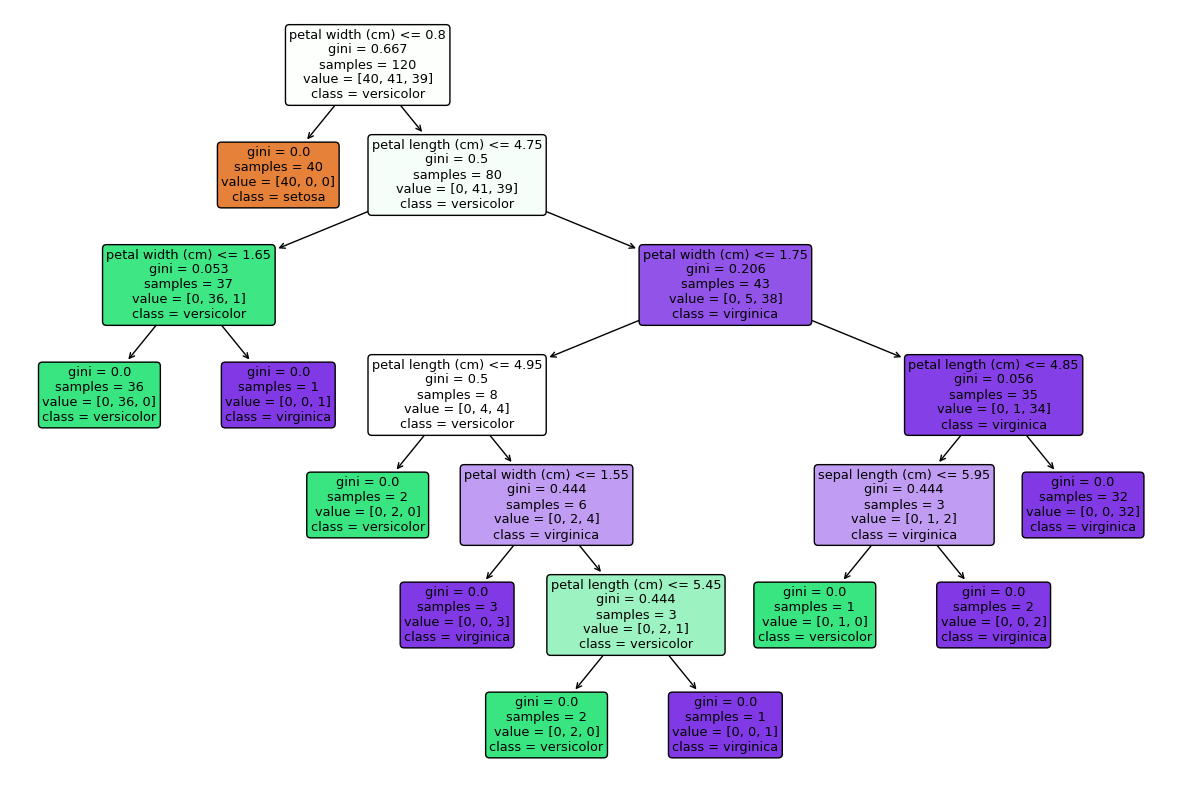

Prediction for new sample: setosa


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_text
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Visualize the decision tree
tree_rules = export_text(clf, feature_names=iris.feature_names)
print("Decision Tree Rules:\n", tree_rules)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()

# Now, you can use the trained classifier to classify a new sample
new_sample = [[5.1, 3.5, 1.4, 0.2]]  # Replace this with your own values
prediction = clf.predict(new_sample)
print(f"Prediction for new sample: {iris.target_names[prediction[0]]}")


# 4

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear')  # Use 'linear' kernel for simplicity

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Now, you can use the trained SVM classifier to classify a new sample
new_sample = [[5.1, 3.5, 1.4, 0.2]]  # Replace this with your own values
prediction = svm_classifier.predict(new_sample)
print(f"Prediction for new sample: {iris.target_names[prediction[0]]}")


Accuracy: 1.0
Prediction for new sample: setosa


# 5

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a k-Nearest Neighbors Classifier with k=3 (you can adjust k as needed)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the k-NN classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Print correct and wrong predictions
correct_predictions = 0
wrong_predictions = 0

for i in range(len(y_test)):
    actual_class = iris.target_names[y_test[i]]
    predicted_class = iris.target_names[y_pred[i]]
    if actual_class == predicted_class:
        correct_predictions += 1
    else:
        wrong_predictions += 1
    print(f"Actual: {actual_class}, Predicted: {predicted_class}")

# Print overall accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy: {accuracy}")

# Print number of correct and wrong predictions
print(f"Correct Predictions: {correct_predictions}")
print(f"Wrong Predictions: {wrong_predictions}")


Actual: versicolor, Predicted: versicolor
Actual: setosa, Predicted: setosa
Actual: virginica, Predicted: virginica
Actual: versicolor, Predicted: versicolor
Actual: versicolor, Predicted: versicolor
Actual: setosa, Predicted: setosa
Actual: versicolor, Predicted: versicolor
Actual: virginica, Predicted: virginica
Actual: versicolor, Predicted: versicolor
Actual: versicolor, Predicted: versicolor
Actual: virginica, Predicted: virginica
Actual: setosa, Predicted: setosa
Actual: setosa, Predicted: setosa
Actual: setosa, Predicted: setosa
Actual: setosa, Predicted: setosa
Actual: versicolor, Predicted: versicolor
Actual: virginica, Predicted: virginica
Actual: versicolor, Predicted: versicolor
Actual: versicolor, Predicted: versicolor
Actual: virginica, Predicted: virginica
Actual: setosa, Predicted: setosa
Actual: virginica, Predicted: virginica
Actual: setosa, Predicted: setosa
Actual: virginica, Predicted: virginica
Actual: virginica, Predicted: virginica
Actual: virginica, Predicted: 

## 6. Write a program to demonstrate the working of  EM algorithm

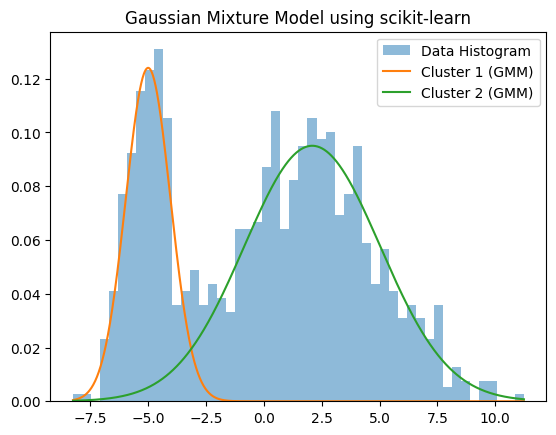

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generate synthetic data
np.random.seed(42)
data = np.concatenate([np.random.normal(-5, 1, 300),
                       np.random.normal(2, 3, 700)])

# Reshape the data for sklearn GMM input
data = data.reshape(-1, 1)

# Fit a Gaussian Mixture Model
num_clusters = 2
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
gmm.fit(data)

# Plot the results
x = np.linspace(np.min(data), np.max(data), 1000)
plt.hist(data, bins=50, density=True, alpha=0.5, label='Data Histogram')
for i in range(num_clusters):
    pdf = gmm.weights_[i] * np.exp(-0.5 * ((x - gmm.means_[i])**2) / gmm.covariances_[i]) / (np.sqrt(2 * np.pi * gmm.covariances_[i]))
    plt.plot(x, pdf.flatten(), label=f'Cluster {i + 1} (GMM)')

plt.legend()
plt.title('Gaussian Mixture Model using scikit-learn')
plt.show()


## 7.Write a python program to implement Naive bayesian Classifier using any appropriate dataset.

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 8. Write a program to implement K means Clustering, demonstrate the working by considering appropriate dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


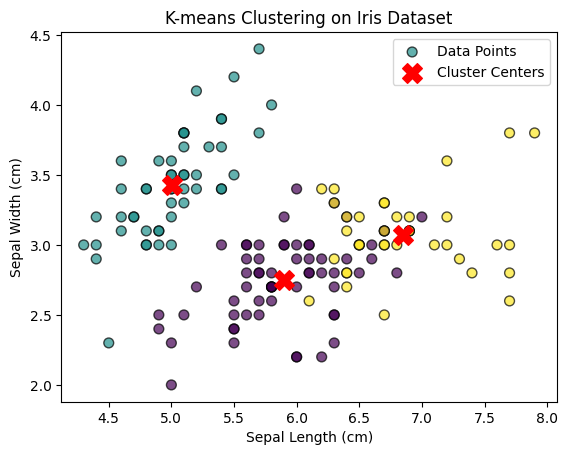

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data

# Initialize the K-means algorithm with 3 clusters (as there are 3 classes in Iris)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the K-means model to the data
kmeans.fit(X)

# Get the cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plot the data points with their assigned clusters and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50, alpha=0.7, label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-means Clustering on Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()


## 9.Write a program to demonstrate the working of Apriori alogirthm.

In [15]:
import pandas as pd

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample transaction data
transactions = [
    ['bread', 'milk', 'beer'],
    ['bread', 'diapers', 'eggs'],
    ['milk', 'diapers', 'beer', 'cola'],
    ['bread', 'milk', 'diapers', 'beer'],
    ['bread', 'milk', 'diapers', 'cola']
]

# Convert the transaction data to a binary matrix
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display frequent itemsets and rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
    support                itemsets
0       0.6                  (beer)
1       0.8                 (bread)
2       0.4                  (cola)
3       0.8               (diapers)
4       0.8                  (milk)
5       0.4           (beer, bread)
6       0.4         (beer, diapers)
7       0.6            (milk, beer)
8       0.6        (bread, diapers)
9       0.6           (milk, bread)
10      0.4         (diapers, cola)
11      0.4            (milk, cola)
12      0.6         (milk, diapers)
13      0.4     (milk, beer, bread)
14      0.4   (milk, beer, diapers)
15      0.4  (milk, bread, diapers)
16      0.4   (milk, diapers, cola)

Association Rules:
        antecedents      consequents  antecedent support  consequent support  \
0            (milk)           (beer)                 0.8                 0.6   
1            (beer)           (milk)                 0.6                 0.8   
2           (bread)        (diapers)                 0.8                 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 10.Write a program to implement PCA by using appropriate datasets for the computation.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


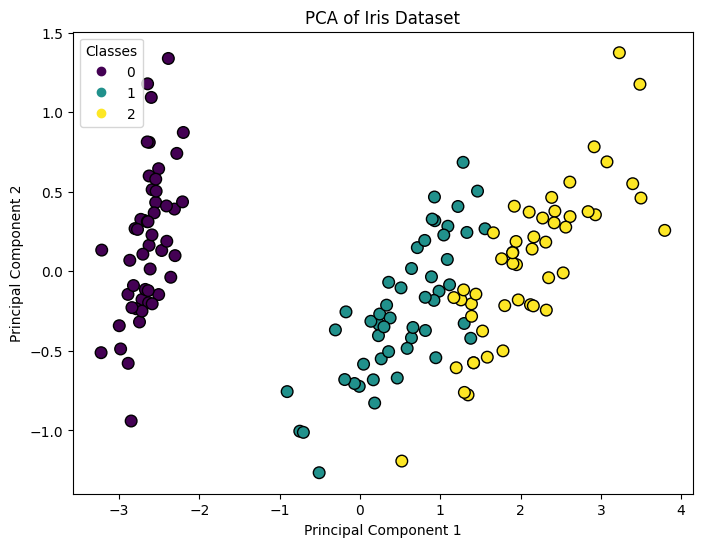

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA with 2 components (for 2D visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', s=70)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.show()


In [ ]:
|